### **Carga de datos Yelp**

**Descripción de los Datos de Yelp**
Para analizar el desempeño de nuestro cliente , se han recopilado datos detallados de Yelp, una de las principales plataformas de reseñas gastronómicas. La información se encuentra distribuida en cinco archivos distintos, cada uno con datos clave para comprender el mercado y la percepción de los consumidores.

**1 . Archivo: User**
El archivo User almacena información sobre los usuarios de Yelp que han interactuado con los restaurantes de la cadena y sus competidores. Incluye detalles como el número total de reseñas publicadas por cada usuario, su ubicación, el promedio de calificaciones otorgadas y otros comportamientos dentro de la plataforma. Estos datos permiten identificar clientes leales, analizar perfiles demográficos y comprender cómo distintos grupos de consumidores interactúan con los restaurantes evaluados.

**2. Archivo: Tip**

El archivo Tip contiene recomendaciones breves dejadas por los usuarios sobre los restaurantes en Yelp. Aunque son más concisas que las reseñas tradicionales, ofrecen insights valiosos sobre aspectos destacados por los clientes. Este archivo complementa el análisis de las reseñas al proporcionar información adicional sobre expectativas y preferencias del público.

**3. Archivo: Review.json**

El archivo Review.json recopila las reseñas de los clientes que han visitado los restaurantes de interés. Cada reseña incluye información como la calificación otorgada (de 1 a 5 estrellas), el texto de la reseña, la fecha de publicación y otros atributos que reflejan la experiencia del usuario. Este archivo es esencial para realizar análisis de sentimientos y evaluar la percepción del mercado sobre China Garden y sus competidores. También facilita la identificación de tendencias en los comentarios de los clientes, puntos fuertes y oportunidades de mejora.

**4. Archivo: Checkin.json**

El archivo Checkin.json registra datos sobre horarios de visitas y reservas de los usuarios en los restaurantes. Permite analizar los períodos de mayor actividad, la popularidad en distintos días de la semana y la frecuencia de las visitas. Este análisis resulta clave para comprender el comportamiento de los clientes, optimizar los horarios de operación y definir estrategias de marketing eficaces.


**5. Archivo: business.pkl**

El archivo business.pkl contiene información relevante sobre los restaurantes listados en Yelp. Incluye detalles como el nombre, dirección, categoría, atributos adicionales (por ejemplo, si ofrece opciones vegetarianas o estacionamiento) y su ubicación geográfica exacta. Estos datos permiten realizar análisis espaciales, identificar patrones en la distribución de los restaurantes y comparar sus características con las de la competencia en el mismo mercado.




**Proceso de Preparación de los Datos**

Para llevar a cabo un análisis integral, se procederá con la limpieza y consolidación de los datos de cada archivo:

Integración de la información de business.pkl con los datos de reseñas, tips, check-ins y usuarios.

Procesamiento de los archivos JSON para extraer información relevante sobre la actividad de los clientes, patrones de reserva y calificaciones.

Análisis conjunto de los datos de Yelp para identificar oportunidades de mejora y estrategias de crecimiento para China Garden en la costa este de Estados Unidos.

Esta estructura de datos permitirá desarrollar un estudio detallado que no solo analice la competencia y el posicionamiento actual del cliente, sino que también incorpore en tiempo real las expectativas y percepciones de los clientes.

#  **1. EDA user.parquet**

## Carga y exploracion de del archivo

In [75]:
# Importacion de librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gcsfs
from google.auth import default
from google.auth.transport.requests import Request
from IPython.display import display

# Autenticación en Google Cloud
# En Vertex AI Workbench, la autenticación suele estar configurada por defecto.
# Si es necesario, se pueden obtener y refrescar las credenciales de la siguiente manera:
credentials, project = default()
credentials.refresh(Request())

# Nombre del bucket y ruta del archivo Parquet en GCS
bucket_name = 'dataset-pf-gyelp'
file_path = f'gs://{bucket_name}/Yelp/user.parquet'

# Crear el sistema de archivos GCS
fs = gcsfs.GCSFileSystem()

# Cargar el archivo Parquet en un DataFrame
with fs.open(file_path, 'rb') as f:
    df_users = pd.read_parquet(f)

# Mostrar una vista previa de los primeros registros
print("\n🔹 Primeras 5 filas del DataFrame:")
display(df_users.head())




🔹 Primeras 5 filas del DataFrame:


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


## Análisis y limpieza de valores nulos

In [81]:
# Análisis de valores nulos
df_nulls = df_users.isnull().sum()
print(f"Total de valores nulos en el DataFrame: {df_nulls.sum()}")
print(f"Total de valores nulos en el DataFrame: {df_nulls.sum().sum()}")
display(df_nulls[df_nulls > 0])


Total de valores nulos en el DataFrame: 0
Total de valores nulos en el DataFrame: 0


Series([], dtype: int64)

In [82]:

# Tratamiento de valores nulos (rellenar con valores adecuados o eliminar filas/columnas si es necesario)
df_users = df_users.ffill()

## Analisis y tratamiento de Valores duplicados

In [67]:
# Análisis de duplicados
duplicates = df_users.duplicated().sum()
print(f"\n🔹 Número de filas duplicadas: {duplicates}")


🔹 Número de filas duplicadas: 117700


In [69]:
# Eliminación de duplicados
df_users = df_users.drop_duplicates()

# Contar duplicados después de la eliminación
duplicates_after = df_users.duplicated().sum()
print(f"🔹 Número de filas duplicadas después de la eliminación: {duplicates_after}")

🔹 Número de filas duplicadas después de la eliminación: 0


## Informacion de las columnas del Dataframe

In [70]:
# Mostrar información del DataFrame
print("\n🔹 Información del DataFrame:")
display(df_users.info())


🔹 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 348.8+ MB


None

## Estadísticas descriptivas

In [54]:
# Mostrar estadísticas descriptivas
print("\n🔹 Estadísticas descriptivas:")
display(df_users.describe().style.background_gradient(cmap="Blues"))



🔹 Estadísticas descriptivas:


,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,year
count,1987897.000000,1987897,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000,1987897.000000
mean,23.394409,2014-10-07 07:10:01.368328704,42.296335,16.970536,23.792914,1.465740,3.630494,1.807072,0.292263,0.179318,0.133649,0.063907,1.443135,3.011841,2.829308,2.829308,1.056448,1.226859,2014.274459
min,0.000000,2004-10-12 08:46:11,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,2.000000,2012-06-30 17:12:57,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000
50%,5.000000,2014-10-12 15:09:56,3.000000,0.000000,0.000000,0.000000,3.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
75%,17.000000,2016-11-26 01:12:32,13.000000,2.000000,3.000000,0.000000,4.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
max,17473.000000,2022-01-19 17:15:47,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,13501.000000,14180.000000,13654.000000,12669.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,82630.000000,2022.000000
std,82.566992,nan,641.480597,407.803437,565.351295,18.130753,1.183337,73.601841,12.824667,15.155253,11.356823,10.043627,60.167900,119.389804,96.663854,96.663854,32.179728,95.157513,3.108074


## Análisis de usuarios por año de registro

In [55]:
df_users['yelping_since'] = pd.to_datetime(df_users['yelping_since'])  # Convertir a datetime
df_users['year'] = df_users['yelping_since'].dt.year  # Extraer el año

user_counts = df_users['year'].value_counts().sort_index()

print("\n🔹 Cantidad de usuarios por año de registro:")
display(user_counts.to_frame().style.background_gradient(cmap="Greens"))


🔹 Cantidad de usuarios por año de registro:


,count
year,
2004,90
2005,937
2006,5423
2007,15340
2008,31097
2009,64911
2010,109054
2011,176435
2012,195955


## Cantidad de usuarios por año de registro

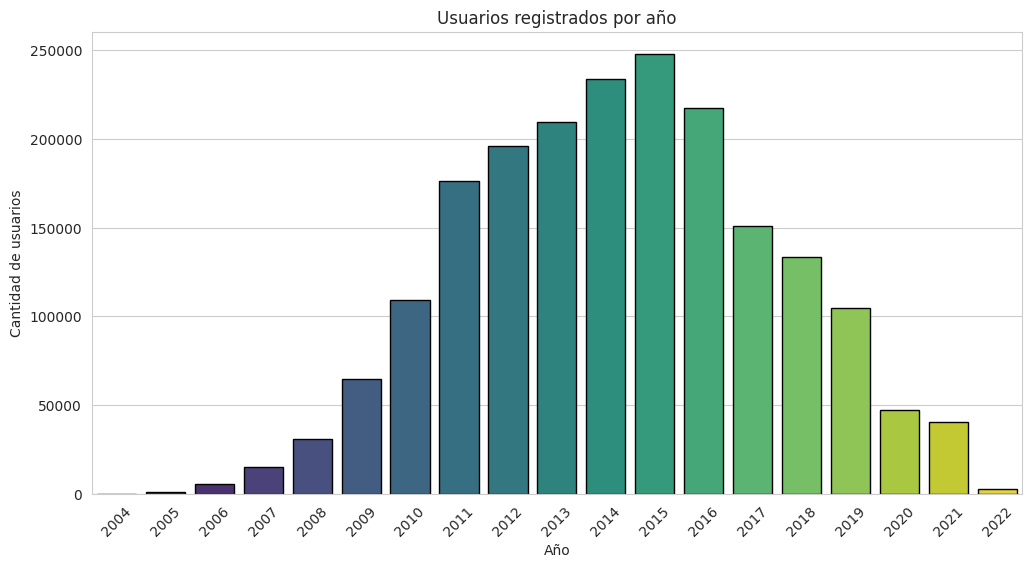

In [56]:
# Configuración de estilo para gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Gráfico de cantidad de usuarios por año de registro
sns.barplot(x=user_counts.index, y=user_counts.values, hue=user_counts.index, palette="viridis", edgecolor="black", legend=False)
plt.xticks(rotation=45)
plt.title("Usuarios registrados por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de usuarios")
plt.show()

# **2. EDA. tip.json**

## Carga y exploracion del dataset

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from wordcloud import WordCloud
from google.auth import default
from google.cloud import storage
from IPython.display import display

# Configuración de autenticación
credentials, project = default()

# Nombre del bucket y rutas de los archivos en GCS
bucket_name = 'dataset-pf-gyelp'  # Reemplaza con el nombre de tu bucket
json_file_path = f'Yelp/tip.json'  # Reemplaza con la ruta correcta dentro del bucket
parquet_file_path = f'Yelp/tip.parquet'  # Reemplaza con la ruta deseada dentro del bucket

# Inicializar el cliente de GCS
client = storage.Client(credentials=credentials, project=project)
bucket = client.bucket(bucket_name)

# Leer el archivo JSON desde GCS en un DataFrame de pandas
print("\n📥 Cargando archivo JSON desde GCS...")
blob = bucket.blob(json_file_path)
content = blob.download_as_text()

# Solución: envolver en StringIO antes de leer con read_json
df_tips = pd.read_json(io.StringIO(content), lines=True)

# Convertir y guardar el DataFrame como archivo Parquet en GCS
print("\n💾 Guardando archivo en formato Parquet en GCS...")
blob = bucket.blob(parquet_file_path)
blob.upload_from_string(df_tips.to_parquet(index=False), 'application/octet-stream')

# Leer el archivo Parquet desde GCS en un DataFrame de pandas
print("\n📂 Cargando archivo Parquet desde GCS...")
blob = bucket.blob(parquet_file_path)
content = blob.download_as_bytes()
df_tips_parquet = pd.read_parquet(pd.io.common.BytesIO(content))

# Vista previa de los datos
print("\n🔹 Primeras 5 filas del DataFrame:")
display(df_tips_parquet.head())






📥 Cargando archivo JSON desde GCS...

💾 Guardando archivo en formato Parquet en GCS...

📂 Cargando archivo Parquet desde GCS...

🔹 Primeras 5 filas del DataFrame:


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


## Información general del DataFrame

In [89]:

print("\n🔹 Información del DataFrame:")
display(df_tips_parquet.info())




🔹 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


None

# Estadísticas descriptivas

In [90]:

print("\n🔹 Estadísticas descriptivas:")
display(df_tips_parquet.describe().style.background_gradient(cmap="Blues"))




🔹 Estadísticas descriptivas:


,date,compliment_count
count,908915,908915.000000
mean,2015-06-14 10:13:53.302817280,0.012525
min,2009-04-16 13:11:49,0.000000
25%,2013-01-26 01:18:02.500000,0.000000
50%,2015-03-15 01:10:25,0.000000
75%,2017-08-02 06:19:55.500000,0.000000
max,2022-01-19 20:38:55,6.000000
std,nan,0.120763


# Verificar valores nulos

In [91]:

print("\n🔹 Valores nulos en el DataFrame:")
display(df_tips_parquet.isnull().sum().to_frame().style.background_gradient(cmap="Reds"))




🔹 Valores nulos en el DataFrame:


,0
user_id,0
business_id,0
text,0
date,0
compliment_count,0


## Identificación y tratamiento de duplicados

In [106]:
# Contar y eliminar duplicados
initial_rows = df_tips_parquet.shape[0]
duplicates_count = df_tips_parquet.duplicated().sum()
print(f"\n🔄 Duplicados encontrados: {duplicates_count}")
df_tips_parquet.drop_duplicates(inplace=True)
final_rows = df_tips_parquet.shape[0]
print(f"\n✅ Filas antes: {initial_rows}, después de eliminar duplicados: {final_rows}")


🔄 Duplicados encontrados: 67

✅ Filas antes: 908915, después de eliminar duplicados: 908848


## Distribución de la longitud de los tips 

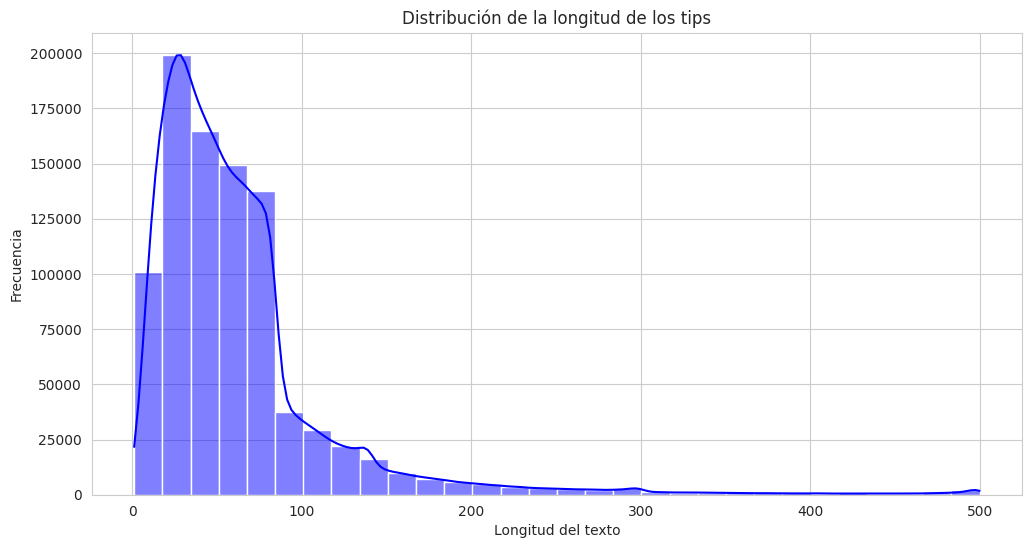

In [92]:
# Configuración de estilo para gráficos
sns.set_style("whitegrid")

# Distribución de la longitud de los tips 
if 'text' in df_tips_parquet.columns:
    df_tips_parquet['text_length'] = df_tips_parquet['text'].astype(str).apply(len)

    plt.figure(figsize=(12, 6))
    sns.histplot(df_tips_parquet['text_length'], bins=30, kde=True, color="blue")
    plt.title("Distribución de la longitud de los tips")
    plt.xlabel("Longitud del texto")
    plt.ylabel("Frecuencia")
    plt.show()



## Gráfico de evolución temporal de los tips si existe la columna 'date'

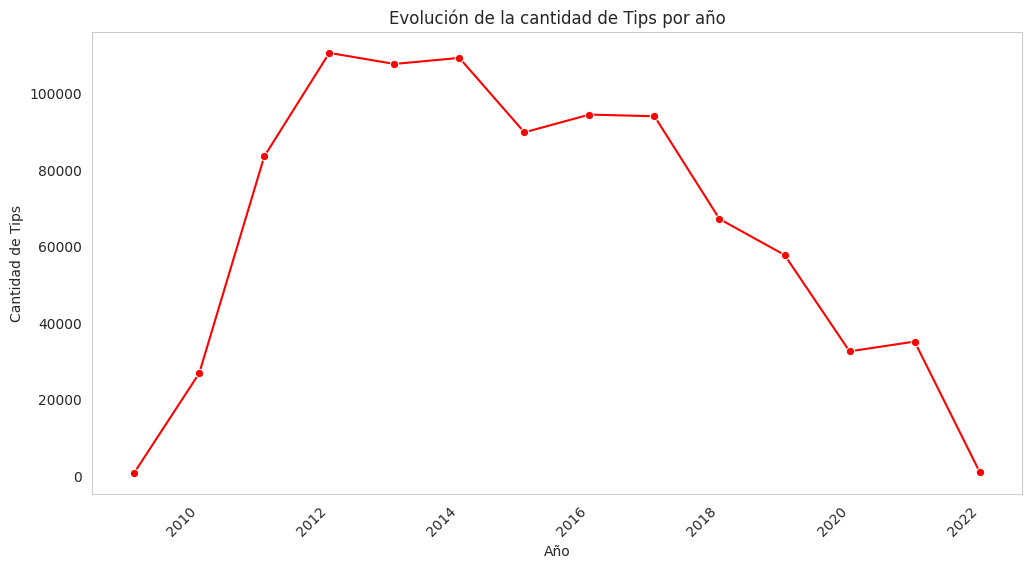

In [112]:
# Gráfico de evolución temporal de los tips si existe la columna 'date'
if 'date' in df_tips_parquet.columns:
    df_tips_parquet['date'] = pd.to_datetime(df_tips_parquet['date'])
    df_tips_parquet.sort_values(by='date', inplace=True)
    df_tips_parquet['year'] = df_tips_parquet['date'].dt.year
    
    # Convertir a DataFrame adecuado para Seaborn
    tips_per_year = df_tips_parquet.groupby('year').size().reset_index(name='count')
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=tips_per_year, x='year', y='count', marker='o', color='red')
    plt.xticks(rotation=45, ha='right')
    plt.title("Evolución de la cantidad de Tips por año")
    plt.xlabel("Año")
    plt.ylabel("Cantidad de Tips")
    plt.grid()
    plt.show()


# Conteo de tips por usuario 

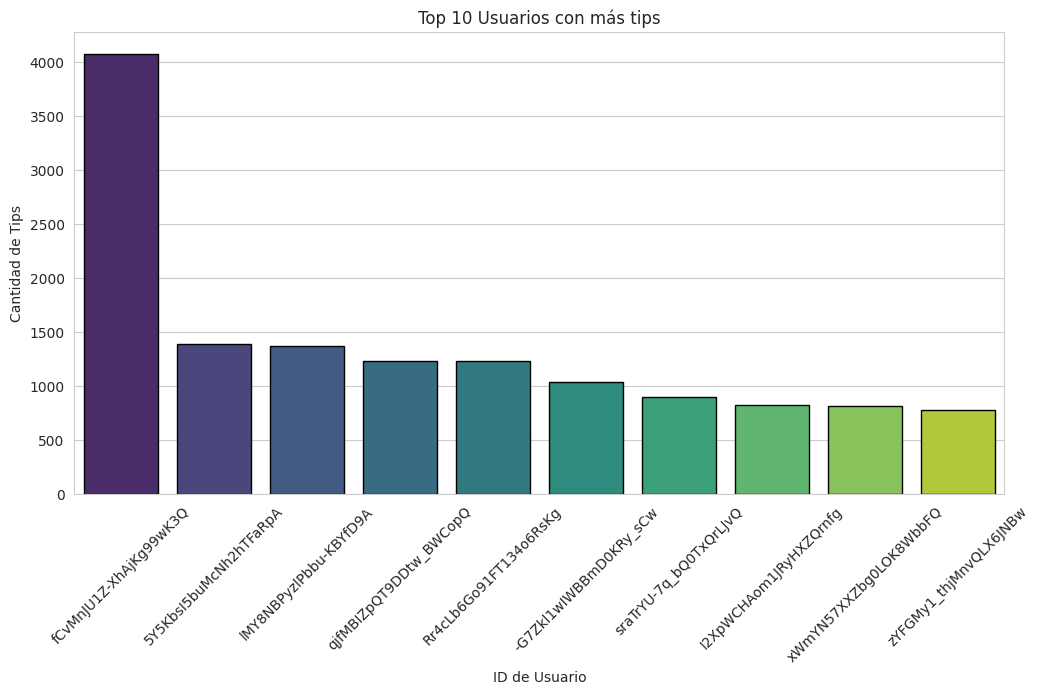

In [110]:

if 'user_id' in df_tips_parquet.columns:
    top_users = df_tips_parquet['user_id'].value_counts().head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_users.index, y=top_users.values, hue=top_users.index, palette="viridis", edgecolor="black", legend=False)
    plt.xticks(rotation=45)
    plt.title("Top 10 Usuarios con más tips")
    plt.xlabel("ID de Usuario")
    plt.ylabel("Cantidad de Tips")
    plt.show()

## Nube de palabras de los tips


☁️ Generando nube de palabras...


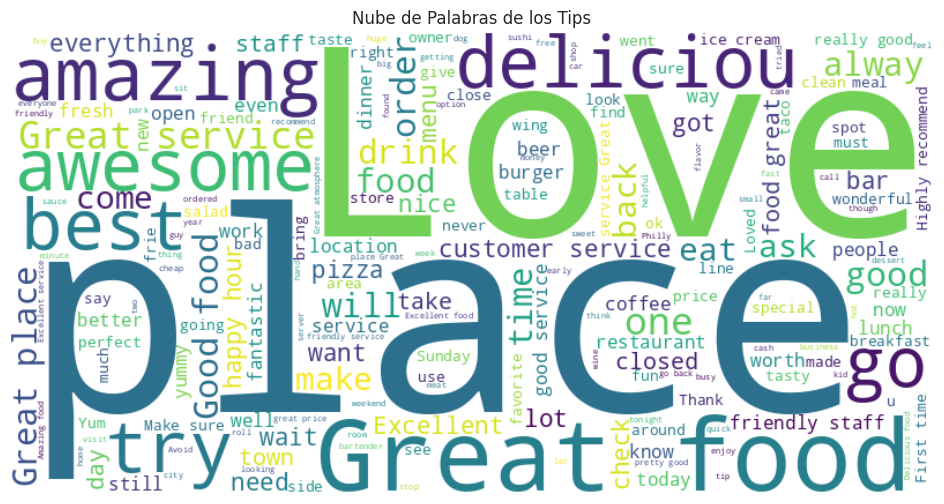

In [100]:
    # Generar una nube de palabras
    print("\n☁️ Generando nube de palabras...")
    text_combined = " ".join(df_tips_parquet['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de Palabras de los Tips")
    plt.show()

# **3. EDA review.json**

## Importacion de librerias y carga del dataset


In [131]:
import pandas as pd
import json
import gcsfs
from google.auth import default
from IPython.display import display

# Autenticación en Google Cloud
credentials, project = default()

# Nombre del bucket y archivo en GCS
bucket_name = "dataset-pf-gyelp"
json_file_path = f"gs://{bucket_name}/Yelp/review.json"
parquet_file_path = f"gs://{bucket_name}/Yelp/review.parquet"

# Cargar el archivo JSON directamente desde GCS en fragmentos para anejar archivos grandes sin consumir mucha memoria.
print("\n📂 Cargando archivo JSON desde Google Cloud Storage en fragmentos...")
fs = gcsfs.GCSFileSystem()
with fs.open(json_file_path, 'r') as file:
    # Leer el archivo línea por línea y procesar en fragmentos
    chunk_size = 10000  # Número de líneas por fragmento
    chunks = []
    chunk = []
    for i, line in enumerate(file):
        chunk.append(json.loads(line))
        if (i + 1) % chunk_size == 0:
            chunks.append(pd.DataFrame(chunk))
            chunk = []
    if chunk:
        chunks.append(pd.DataFrame(chunk))
    df_reviews = pd.concat(chunks, ignore_index=True)

# Guardar el DataFrame como Parquet para optimizar futuras lecturas
print("\n💾 Guardando archivo en formato Parquet...")
with fs.open(parquet_file_path, 'wb') as f:
    df_reviews.to_parquet(f, engine="pyarrow")


📂 Cargando archivo JSON desde Google Cloud Storage en fragmentos...

💾 Guardando archivo en formato Parquet...


## Explorando la la informacion del dataset

In [132]:
print("\n🔹 Primeras 5 filas del DataFrame:")
display(df_reviews.head())


🔹 Primeras 5 filas del DataFrame:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## Analisis de los tipos de dato

In [133]:
print("\n🔹 Información del DataFrame:")
display(df_reviews.info())


🔹 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


None

## Corrección de tipos de datos

In [138]:
print("\n🔄 Corrigiendo tipos de datos...")

df_reviews["stars"] = df_reviews["stars"].astype("int64")  # Convertir a entero
df_reviews["date"] = pd.to_datetime(df_reviews["date"])  # Convertir a fecha

print("\n✅ Tipos de datos corregidos:")
display(df_reviews.dtypes)


🔄 Corrigiendo tipos de datos...

✅ Tipos de datos corregidos:


review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

## Análisis y tratamiento de valores duplicados

In [134]:
# 🔍 Análisis de valores duplicados
print("\n🔎 Buscando valores duplicados...")

total_duplicates = df_reviews.duplicated().sum()
percentage_duplicates = (total_duplicates / len(df_reviews)) * 100

print(f"📊 Total de filas duplicadas: {total_duplicates} ({percentage_duplicates:.2f}%)")

if total_duplicates > 0:
    print("\n🛠️ Eliminando valores duplicados...")
    df_reviews.drop_duplicates(inplace=True)
    print(f"✅ Se eliminaron {total_duplicates} filas duplicadas.")
    print(f"📉 Nuevo tamaño del DataFrame: {df_reviews.shape[0]} filas, {df_reviews.shape[1]} columnas.")
else:
    print("✅ No se encontraron filas duplicadas.")


🔎 Buscando valores duplicados...
📊 Total de filas duplicadas: 0 (0.00%)
✅ No se encontraron filas duplicadas.


## Información estadística

In [135]:
print("\n🔹 Estadísticas descriptivas:")
display(df_reviews.describe().style.background_gradient(cmap="Blues"))


🔹 Estadísticas descriptivas:


,stars,useful,funny,cool
count,6990280.000000,6990280.000000,6990280.000000,6990280.000000
mean,3.748584,1.184609,0.326560,0.498618
std,1.478705,3.253767,1.688729,2.172460
min,1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,1182.000000,792.000000,404.000000


## Identificacion de valores nulos

In [137]:
print("\n🔹 Valores nulos en el DataFrame:")
display(df_reviews.isnull().sum().to_frame().style.background_gradient(cmap="Reds"))


🔹 Valores nulos en el DataFrame:


,0
review_id,0
user_id,0
business_id,0
stars,0
useful,0
funny,0
cool,0
text,0
date,0


## Distribución de la longitud de los textos

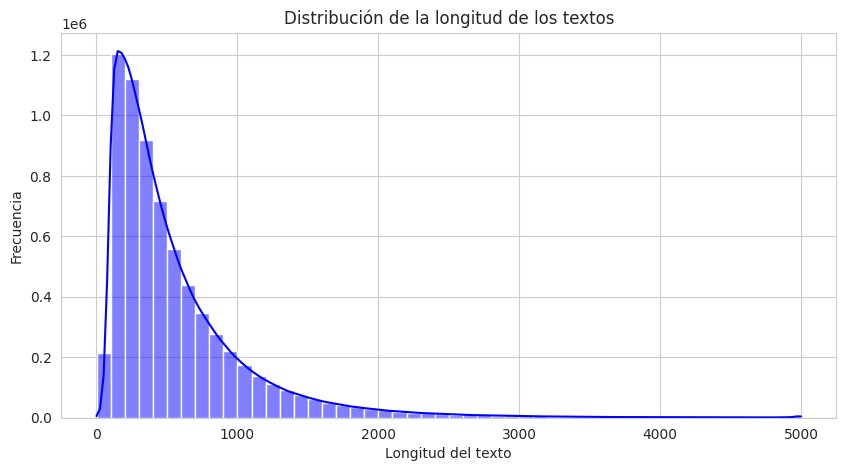

In [139]:
# Longitud de los textos
df_reviews["text_length"] = df_reviews["text"].astype(str).apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(df_reviews["text_length"], bins=50, kde=True, color='blue')
plt.title("Distribución de la longitud de los textos")
plt.xlabel("Longitud del texto")
plt.ylabel("Frecuencia")
plt.show()

## Nube de palabras de las reseñas

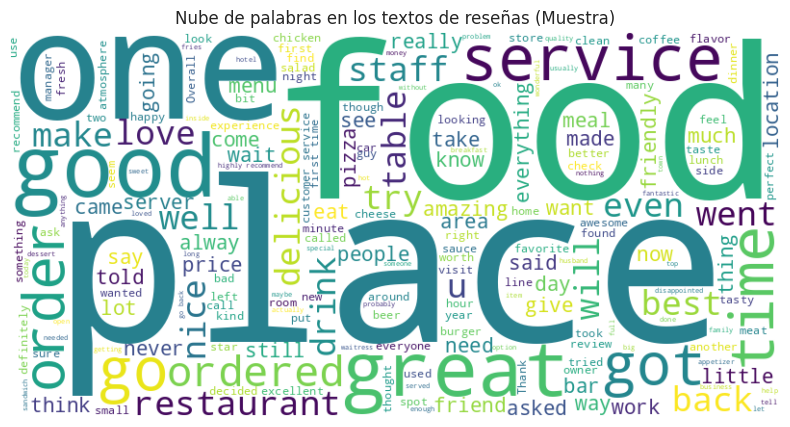

In [140]:
from wordcloud import WordCloud

# Cargar el archivo Parquet
df_reviews = pd.read_parquet("gs://dataset-pf-gyelp/Yelp/review.parquet")

# Asegurar que la columna "text" existe
if "text" not in df_reviews.columns:
    raise ValueError("La columna 'text' no se encuentra en el DataFrame")

# Tomar solo una muestra aleatoria de 50,000 reseñas para evitar sobrecarga
sample_size = min(50000, len(df_reviews))  # Máximo 50,000 reseñas o el total disponible
df_sample = df_reviews.sample(n=sample_size, random_state=42)

# Generar la nube de palabras con la muestra
all_text = " ".join(df_sample["text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras en los textos de reseñas (Muestra)")
plt.show()


## Distribución de calificaciones (estrellas) ⭐
Identificar la tendencia general de las calificaciones (más positivas o negativas).

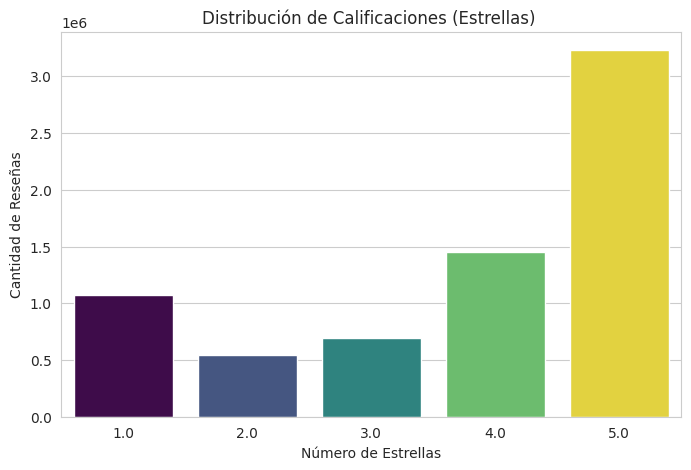

In [143]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_reviews["stars"], hue=df_reviews["stars"], palette="viridis", legend=False)
plt.title("Distribución de Calificaciones (Estrellas) ")
plt.xlabel("Número de Estrellas")
plt.ylabel("Cantidad de Reseñas")
plt.show()



## Análisis de reseñas más útiles (useful) 🏆

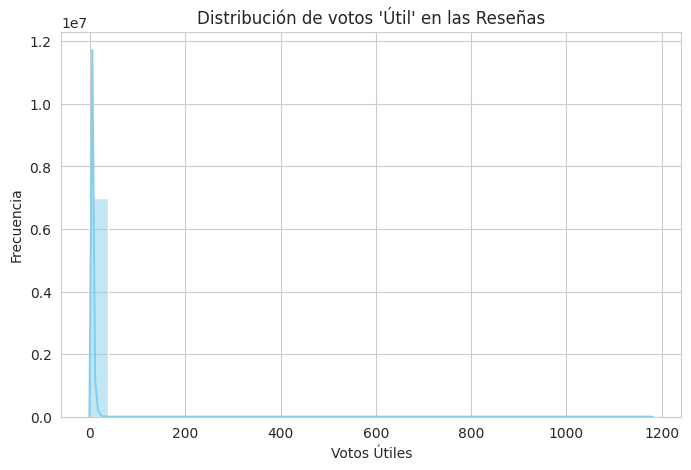

In [151]:
plt.figure(figsize=(8, 5))
sns.histplot(df_reviews["useful"], bins=30, color="skyblue", kde=True)
plt.title("Distribución de votos 'Útil' en las Reseñas")
plt.xlabel("Votos Útiles")
plt.ylabel("Frecuencia")
plt.show()


## ¿Las reseñas más graciosas tienen más votos? (funny vs. useful)

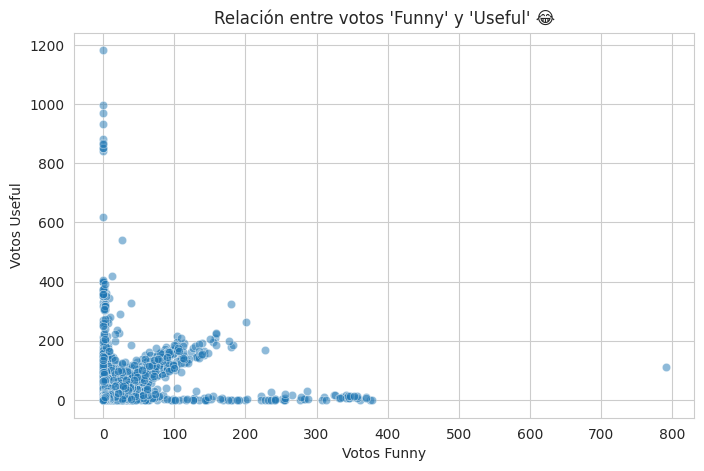

In [152]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_reviews["funny"], y=df_reviews["useful"], alpha=0.5)
plt.title("Relación entre votos 'Funny' y 'Useful' 😂")
plt.xlabel("Votos Funny")
plt.ylabel("Votos Useful")
plt.show()


## Evolución de calificaciones en el tiempo

In [154]:
import pandas as pd

# Convertir la columna 'date' a formato datetime
df_reviews["date"] = pd.to_datetime(df_reviews["date"], errors="coerce")

# Extraer el mes y el año
df_reviews["month"] = df_reviews["date"].dt.to_period("M")

# Verificar que la conversión fue exitosa
print(df_reviews[["date", "month"]].head())


                 date    month
0 2018-07-07 22:09:11  2018-07
1 2012-01-03 15:28:18  2012-01
2 2014-02-05 20:30:30  2014-02
3 2015-01-04 00:01:03  2015-01
4 2017-01-14 20:54:15  2017-01


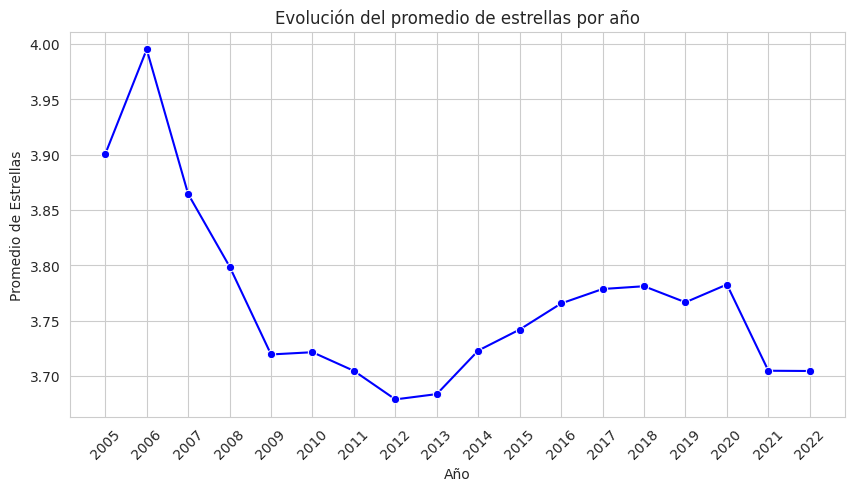

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que 'date' está en formato datetime
df_reviews["date"] = pd.to_datetime(df_reviews["date"], errors="coerce")

# Extraer el año
df_reviews["year"] = df_reviews["date"].dt.year

# Agrupar por año y calcular el promedio de estrellas
stars_over_time = df_reviews.groupby("year")["stars"].mean()

# Graficar la evolución del promedio de estrellas a lo largo de los años
plt.figure(figsize=(10, 5))
sns.lineplot(x=stars_over_time.index, y=stars_over_time.values, marker="o", color="b")
plt.xticks(stars_over_time.index, rotation=45)  # Asegurar que todos los años se muestren
plt.title("Evolución del promedio de estrellas por año")
plt.xlabel("Año")
plt.ylabel("Promedio de Estrellas")
plt.grid(True)
plt.show()


# **4. EDA checkin.json**

In [125]:
import pandas as pd
import gcsfs
from google.auth import default

# Autenticación en Google Cloud
credentials, project = default()
fs = gcsfs.GCSFileSystem(project=project)

# Nombre del bucket y rutas de archivos
bucket_name = 'dataset-pf-gyelp'
json_file_path = f'gs://{bucket_name}/Yelp/checkin.json'
destination_parquet_path = f'gs://{bucket_name}/Yelp/checkin.parquet'

print("\n📥 Cargando archivo JSON desde GCS...")
with fs.open(json_file_path, 'r') as f:
    df_checkin = pd.read_json(f, lines=True)

print("\n💾 Guardando archivo en formato Parquet...")
df_checkin.to_parquet(destination_parquet_path, index=False)
print(f"✅ Archivo guardado en: {destination_parquet_path}")



📥 Cargando archivo JSON desde GCS...

💾 Guardando archivo en formato Parquet...
✅ Archivo guardado en: gs://dataset-pf-gyelp/Yelp/checkin.parquet


In [129]:
print("\n🔹 Primeras 5 filas:")
display(df_checkin.head())


🔹 Primeras 5 filas:


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [127]:
print("\n🔹 Información del DataFrame:")
display(df_checkin.info())




🔹 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


None

In [130]:
print("\n🔹 Valores nulos:")
print(df_checkin.isnull().sum())


🔹 Valores nulos:
business_id    0
date           0
dtype: int64


# **5. EDA business.pkl**

## Carga y exploracion del dataset

In [116]:
from google.cloud import storage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO

# Configuración
BUCKET_NAME = 'dataset-pf-gyelp'
FILE_PATH = 'Yelp/business.pkl'

# Descargar y cargar el DataFrame desde GCS
client = storage.Client()
blob = client.get_bucket(BUCKET_NAME).blob(FILE_PATH)
df_business = pd.read_pickle(BytesIO(blob.download_as_bytes()))

# Mostrar información básica
display(df_business.head())

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analisis de las columnas que conforman el dataset

In [117]:
display(df_business.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

None

## Tratamiento de duplicados

In [119]:
# Eliminar columnas duplicadas
df_business = df_business.loc[:, ~df_business.columns.duplicated()]

## Conversion de tipo de datos

In [120]:
# Convertir tipos de datos
df_business['latitude'] = pd.to_numeric(df_business['latitude'], errors='coerce')
df_business['longitude'] = pd.to_numeric(df_business['longitude'], errors='coerce')
df_business['stars'] = pd.to_numeric(df_business['stars'], errors='coerce')
df_business['review_count'] = pd.to_numeric(df_business['review_count'], errors='coerce').astype('Int64')
df_business['is_open'] = df_business['is_open'].astype('boolean')
df_business['city'] = df_business['city'].astype('string')
df_business['state'] = df_business['state'].astype('string')
df_business['postal_code'] = df_business['postal_code'].astype('string')

In [15]:
print(df_business.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  string 
 4   state         150343 non-null  string 
 5   postal_code   150346 non-null  string 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  Int64  
 10  is_open       150346 non-null  boolean
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: Int64(1), boolean(1), float64(3), object(6), string(3)
memory usage: 16.5+ MB
None


## Identificación y tratamiento de valores nulos

In [16]:
display(df_business.isnull().sum())

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [24]:

df_business.fillna({
    'state': 'Unknown',
    'city': 'Unknown',
    'postal_code': '00000',
    'latitude': df_business['latitude'].median(),
    'longitude': df_business['longitude'].median(),
    'stars': df_business['stars'].median(),
    'review_count': 0,
    'is_open': False,
    'attributes': '{}',  # Llenar valores nulos con un diccionario vacío
    'categories': 'Unknown',  # Llenar valores nulos con 'Unknown'
    'hours': '{}'  # Llenar valores nulos con un diccionario vacío
}, inplace=True)

In [25]:
print(df_business.isnull().sum())

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


In [19]:
print(df_business.describe())

            latitude      longitude          stars  review_count
count  150346.000000  150346.000000  150346.000000      150346.0
mean       36.671150     -89.357339       3.596724     44.866561
std         5.872759      14.918502       0.974421    121.120136
min        27.555127    -120.095137       1.000000           5.0
25%        32.187293     -90.357810       3.000000           8.0
50%        38.777413     -86.121179       3.500000          15.0
75%        39.954036     -75.421542       4.500000          37.0
max        53.679197     -73.200457       5.000000        7568.0


 # Distribución de calificaciones

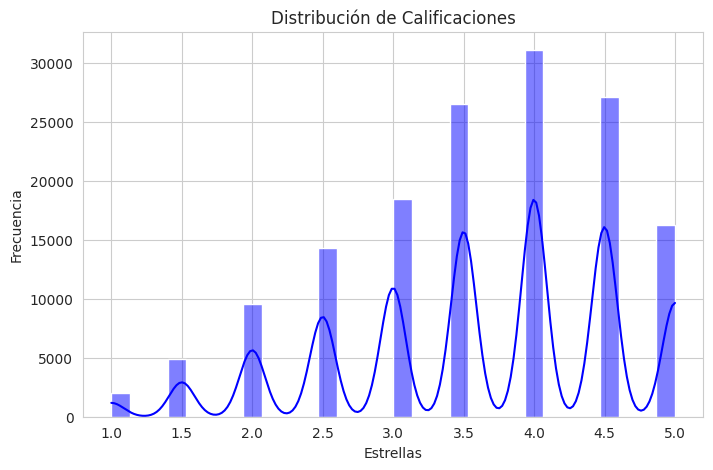

In [26]:
# Configuración de estilo
sns.set_style("whitegrid")

# Gráfico de distribución de calificaciones
if 'stars' in df_business.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_business['stars'], bins=30, kde=True, color="blue")
    plt.title("Distribución de Calificaciones")
    plt.xlabel("Estrellas")
    plt.ylabel("Frecuencia")
    plt.show()

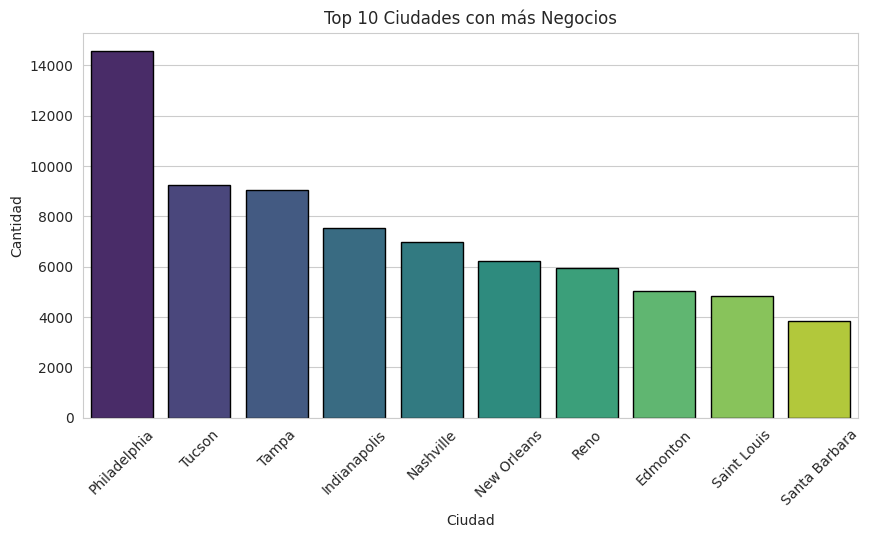

In [28]:
# Gráfico de las 10 ciudades con más negocios
if 'city' in df_business.columns:
    top_cities = df_business['city'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index, palette="viridis", edgecolor="black", legend=False)
    plt.xticks(rotation=45)
    plt.title("Top 10 Ciudades con más Negocios")
    plt.xlabel("Ciudad")
    plt.ylabel("Cantidad")
    plt.show()


# Para nuestro proyecto vamos a enfocar nuestro estudio en el Estado de California

In [30]:
# Filtrar datos de California
df_california = df_business[df_business['state'] == 'CA']


In [121]:
# Mostrar información básica de California
display(df_california.head())
display(df_california.info())
display(df_california.describe())


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,True,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,True,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
88,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,114 N 3rd St,Camden,CA,08102,39.946690,-75.123327,4.5,6,True,"{'BusinessParking': '{'garage': False, 'street...","Juice Bars & Smoothies, Restaurants, Fruits & ...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
94,ZM46RDLXaFNo_z6t-j_L4w,Absolutely Perfect Inc,1153 Byberry Rd,Bensalem,CA,19020,40.113121,-74.914597,3.5,5,True,"{'BusinessAcceptsBitcoin': 'False', 'BusinessA...","Masonry/Concrete, Gardeners, Lawn Services, Tr...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
123,iPSPcprSnkLOuL1Ns8UZZA,Pete's Barber Shop,1209 N 29th St,Philadelphia,CA,19121,39.974880,-75.183262,4.5,12,True,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Barbers, Beauty & Spas",{}


<class 'pandas.core.frame.DataFrame'>
Index: 5203 entries, 3 to 150306
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   5203 non-null   object 
 1   name          5203 non-null   object 
 2   address       5203 non-null   object 
 3   city          5203 non-null   string 
 4   state         5203 non-null   string 
 5   postal_code   5203 non-null   string 
 6   latitude      5203 non-null   float64
 7   longitude     5203 non-null   float64
 8   stars         5203 non-null   float64
 9   review_count  5203 non-null   Int64  
 10  is_open       5203 non-null   boolean
 11  attributes    5203 non-null   object 
 12  categories    5203 non-null   object 
 13  hours         5203 non-null   object 
dtypes: Int64(1), boolean(1), float64(3), object(6), string(3)
memory usage: 584.3+ KB


None

,latitude,longitude,stars,review_count
count,5203.000000,5203.000000,5203.000000,5203.0
mean,36.634549,-89.446996,3.584086,42.854123
std,5.927913,14.901233,0.965172,100.009314
min,27.655285,-119.972435,1.000000,5.0
25%,32.163211,-90.359970,3.000000,8.0
50%,38.742901,-86.112352,3.500000,15.0
75%,39.953133,-75.436856,4.500000,37.0
max,53.648463,-74.703628,5.000000,2406.0


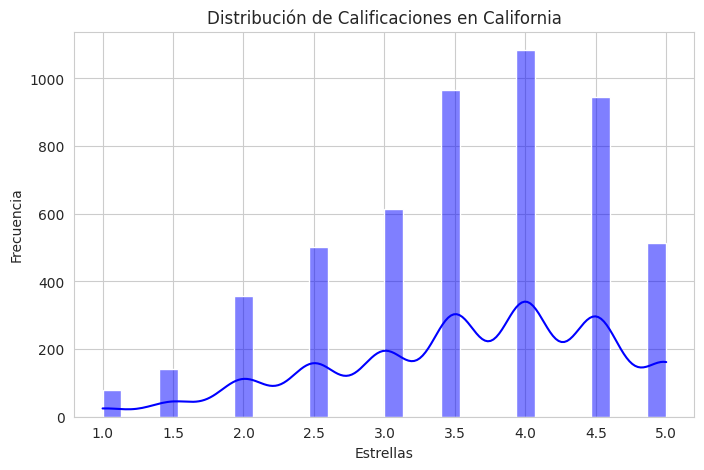

In [122]:
# Configuración de estilo
sns.set_style("whitegrid")

# Gráfico de distribución de calificaciones en California
if 'stars' in df_california.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_california['stars'], bins=30, kde=True, color="blue")
    plt.title("Distribución de Calificaciones en California")
    plt.xlabel("Estrellas")
    plt.ylabel("Frecuencia")
    plt.show()

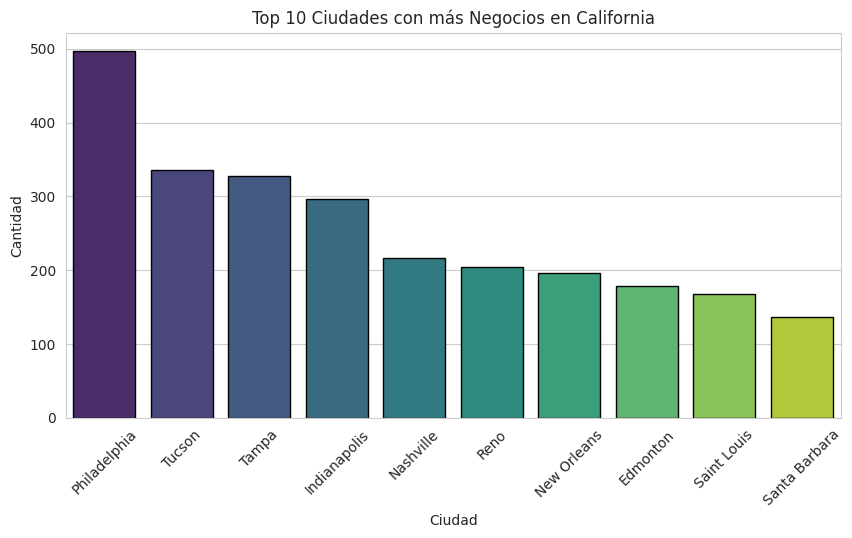

In [123]:
# Gráfico de las 10 ciudades con más negocios en California
if 'city' in df_california.columns:
    top_cities = df_california['city'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index, palette="viridis", edgecolor="black", legend=False)
    plt.xticks(rotation=45)
    plt.title("Top 10 Ciudades con más Negocios en California")
    plt.xlabel("Ciudad")
    plt.ylabel("Cantidad")
    plt.show()